In [24]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('US Chronic Disease CDI recovered.csv')
df.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1
0,2013,2013,CA,California,Alcohol,Alcohol use among youth,%,Crude Prevalence,NaN,NaN,Overall,Overall
1,2013,2013,CO,Colorado,Alcohol,Alcohol use among youth,%,Crude Prevalence,NaN,NaN,Overall,Overall
2,2013,2013,CT,Connecticut,Alcohol,Alcohol use among youth,%,Crude Prevalence,36.7,36.7,Overall,Overall
3,2013,2013,DC,District of Columbia,Alcohol,Alcohol use among youth,%,Crude Prevalence,31.4,31.4,Overall,Overall
4,2013,2013,DE,Delaware,Alcohol,Alcohol use among youth,%,Crude Prevalence,36.3,36.3,Overall,Overall


In [10]:
#dropping columns not needed and making new df name
df_new = df[['YearStart', 'YearEnd', 'LocationDesc','Topic', 'Question', 'DataValueUnit',
       'DataValueType', 'DataValue', 'StratificationCategory1', 'Stratification1',]]
df_new.head(2)

,YearStart,YearEnd,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,StratificationCategory1,Stratification1
0,2013,2013,California,Alcohol,Alcohol use among youth,%,Crude Prevalence,NaN,Overall,Overall
1,2013,2013,Colorado,Alcohol,Alcohol use among youth,%,Crude Prevalence,NaN,Overall,Overall


In [12]:
#Renaming some columns
dfnew = df_new.rename(columns={'LocationDesc': 'State', 'Topic': 'Disease', 'Question': 'Category', 'DataValueUnit': 'Unit', 
                               'DataValueType': 'Type', 'DataValue': 'Value', 
                               'StratificationCategory1': 'RaceOrGender', 'Stratification1': 'RaceGender Data'}) 
dfnew.head(1)


,YearStart,YearEnd,State,Disease,Category,Unit,Type,Value,RaceOrGender,RaceGender Data
0,2013,2013,California,Alcohol,Alcohol use among youth,%,Crude Prevalence,NaN,Overall,Overall


In [14]:
#removing no data
dfnew.replace(['No data available', 'null', '-', '~', '****' 'UNKNOWN'], pd.NA, inplace=True)
df_clean = dfnew.dropna()
df_clean.describe

<bound method NDFrame.describe of         YearStart  YearEnd                 State       Disease  \
2            2013     2013           Connecticut       Alcohol   
3            2013     2013  District of Columbia       Alcohol   
4            2013     2013              Delaware       Alcohol   
5            2013     2013               Florida       Alcohol   
6            2013     2013               Georgia       Alcohol   
...           ...      ...                   ...           ...   
237943       2012     2012              Oklahoma  Older Adults   
237944       2012     2012                Oregon  Older Adults   
237945       2012     2012          Pennsylvania  Older Adults   
237947       2012     2012        South Carolina  Older Adults   
237954       2012     2012            Washington  Older Adults   

                                                 Category Unit  \
2                                 Alcohol use among youth    %   
3                                 Alcohol

<AxesSubplot:xlabel='Disease Name:'>

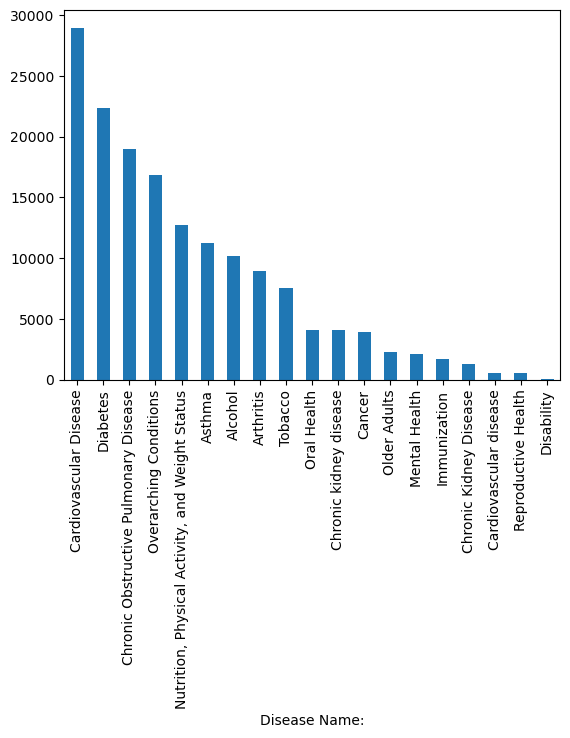

In [15]:
df_clean.groupby(['Disease'])['Value'].count().sort_values(ascending=False).plot(kind='bar', xlabel='Disease Name:')

In [16]:
#highest is Card Vasc Disease, working on it
df1 = df_clean[df_clean['Disease'] == 'Cardiovascular Disease']
df1.shape


(28981, 10)

In [17]:
df1.head(2)

,YearStart,YearEnd,State,Disease,Category,Unit,Type,Value,RaceOrGender,RaceGender Data
87391,2010,2010,Kentucky,Cardiovascular Disease,Mortality from total cardiovascular disease,"cases per 100,000",Crude Rate,282,Gender,Female
87687,2014,2014,Alaska,Cardiovascular Disease,Mortality from total cardiovascular disease,"cases per 100,000",Age-adjusted Rate,244,Gender,Male


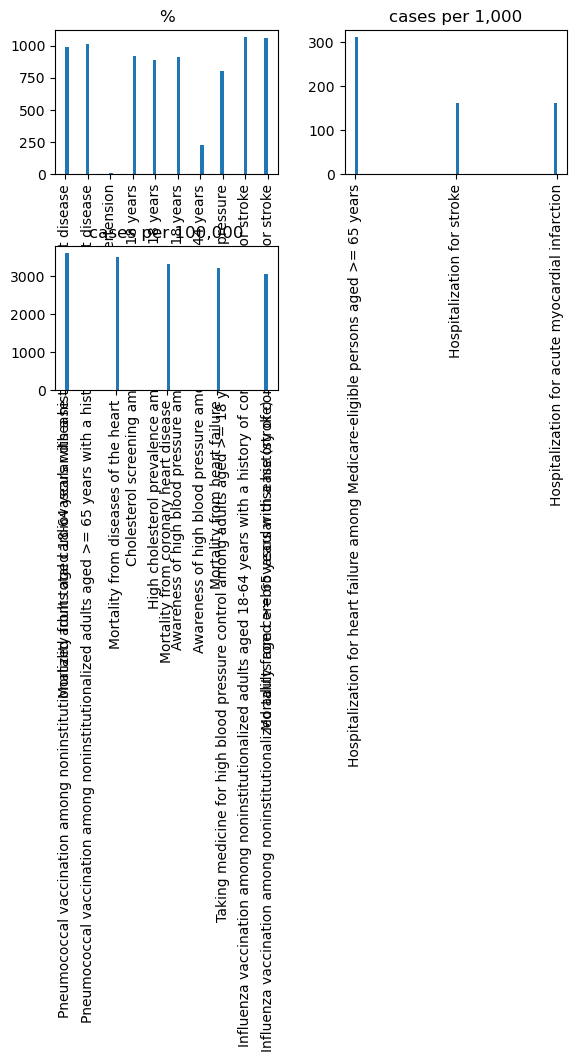

In [23]:

#plots
df1.hist(column='Category', by='Unit', bins=60)
plt.show()

In [28]:
avg_values = df1.groupby('Category')['Value'].mean().reset_index()
avg_values

,Category,Value
0,Awareness of high blood pressure among adults ...,31.572149
1,Awareness of high blood pressure among women a...,15.063043
2,Cholesterol screening among adults aged >= 18 ...,73.981481
3,High cholesterol prevalence among adults aged ...,35.725785
4,Hospitalization for acute myocardial infarction,1.741358
5,Hospitalization for heart failure among Medica...,16.825160
6,Hospitalization for stroke,2.077531
7,Influenza vaccination among noninstitutionaliz...,40.912559
8,Influenza vaccination among noninstitutionaliz...,63.900189
9,Mortality from cerebrovascular disease (stroke),37.905934


                                           Category       Value
9   Mortality from cerebrovascular disease (stroke)   37.905934
10            Mortality from coronary heart disease   97.264385
11             Mortality from diseases of the heart  157.335727
12                     Mortality from heart failure   81.173974
13      Mortality from total cardiovascular disease  206.269139
                                           Category       Value
9   Mortality from cerebrovascular disease (stroke)   37.905934
10            Mortality from coronary heart disease   97.264385
11             Mortality from diseases of the heart  157.335727
12                     Mortality from heart failure   81.173974
13      Mortality from total cardiovascular disease  206.269139


C:\Users\local_yhassan\Temp\ipykernel_36668\117329532.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to fit everything


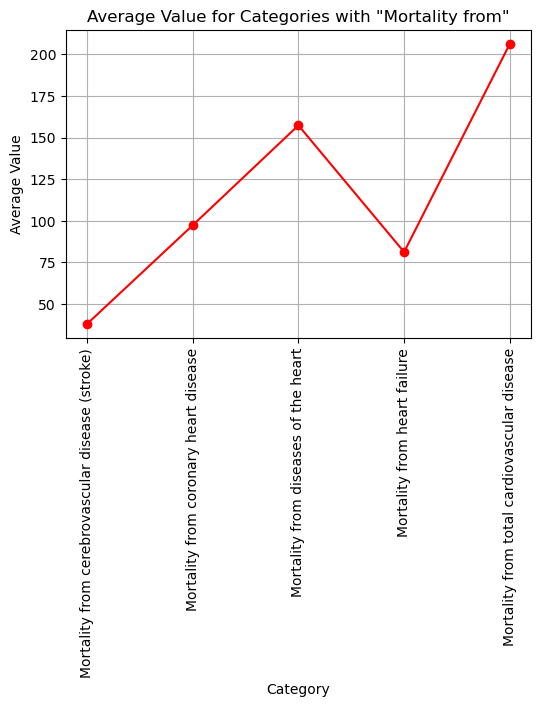

In [55]:
import pandas as pd

# Filter in rows where 'Category' contains the phrase 'Mortality from'
mortality_df = avg_values[avg_values['Category'].str.contains('Mortality from', case=False)]
# Display the result
print(mortality_df)
#trying linear plotting

import pandas as pd
import matplotlib.pyplot as plt
# Assuming your DataFrame is named avg_values and contains the calculated average values
# Filter in rows where 'Category' contains the phrase 'Mortality from'
mortality_df = avg_values[avg_values['Category'].str.contains('Mortality from', case=False)]
# Display the result
print(mortality_df)
# Plot the data as a line plot
plt.figure(figsize=(6, 4))
plt.plot(mortality_df['Category'], mortality_df['Value'], marker='o', linestyle='-', color='red')
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.title('Average Value for Categories with "Mortality from"')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to fit everything
# Show the plot
plt.show()

                                           Category       Value
9   Mortality from cerebrovascular disease (stroke)   37.905934
10            Mortality from coronary heart disease   97.264385
11             Mortality from diseases of the heart  157.335727
12                     Mortality from heart failure   81.173974
13      Mortality from total cardiovascular disease  206.269139


C:\Users\local_yhassan\Temp\ipykernel_36668\4199385006.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to fit everything


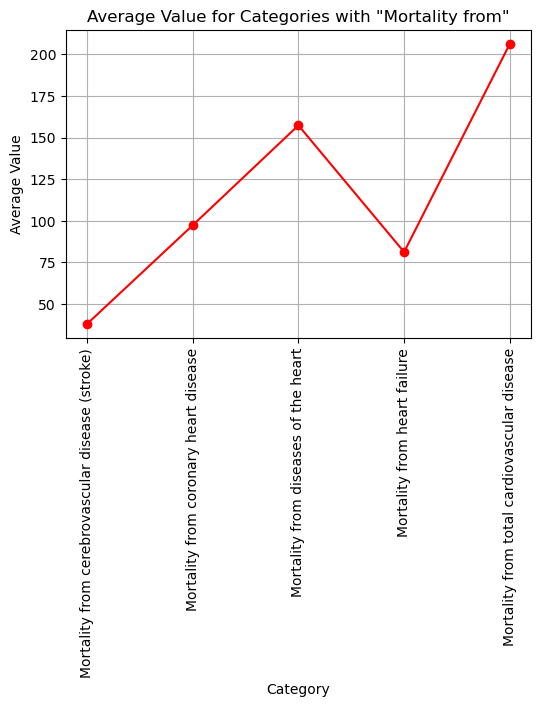

In [54]:
#trying linear plotting

import pandas as pd
import matplotlib.pyplot as plt

# Filter in rows where 'Category' contains the phrase 'Mortality from'
mortality_df = avg_values[avg_values['Category'].str.contains('Mortality from', case=False)]
# Display the result
print(mortality_df)
# Plot the data as a line plot
plt.figure(figsize=(6, 4))
plt.plot(mortality_df['Category'], mortality_df['Value'], marker='o', linestyle='-', color='red')
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.title('Average Value for Categories with "Mortality from"')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to fit everything
# Show the plot
plt.show()

                                           Category    RaceOrGender  \
0   Mortality from cerebrovascular disease (stroke)          Gender   
1   Mortality from cerebrovascular disease (stroke)         Overall   
2   Mortality from cerebrovascular disease (stroke)  Race/Ethnicity   
3             Mortality from coronary heart disease          Gender   
4             Mortality from coronary heart disease         Overall   
5             Mortality from coronary heart disease  Race/Ethnicity   
6              Mortality from diseases of the heart          Gender   
7              Mortality from diseases of the heart         Overall   
8              Mortality from diseases of the heart  Race/Ethnicity   
9                      Mortality from heart failure          Gender   
10                     Mortality from heart failure         Overall   
11                     Mortality from heart failure  Race/Ethnicity   
12      Mortality from total cardiovascular disease          Gender   
13    

C:\Users\local_yhassan\Temp\ipykernel_36668\4146937210.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_df['Value'] = pd.to_numeric(mortality_df['Value'], errors='coerce')
C:\Users\local_yhassan\Temp\ipykernel_36668\4146937210.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to fit everything


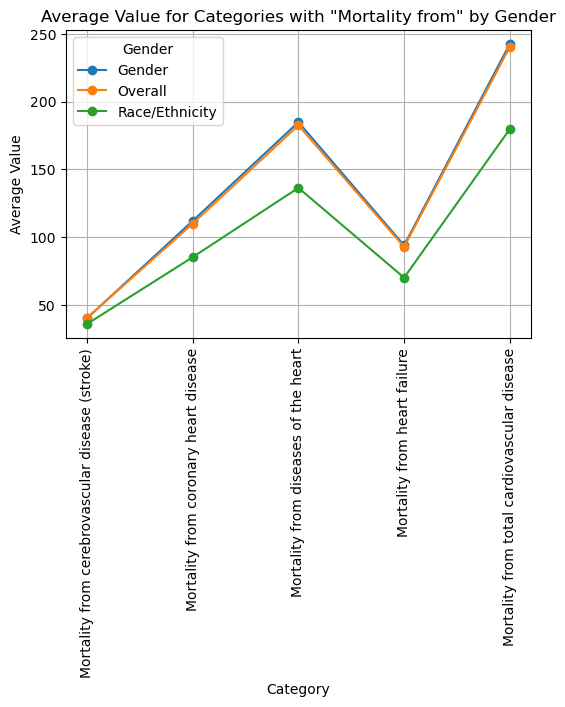

In [51]:
#adding Gender- 

import pandas as pd
import matplotlib.pyplot as plt

# Filter in rows where 'Category' contains the phrase 'Mortality from'
mortality_df = df1[df1['Category'].str.contains('Mortality from', case=False)]
# Convert 'Value' to numeric, if not already done
mortality_df['Value'] = pd.to_numeric(mortality_df['Value'], errors='coerce')
# Drop rows where 'Value' is NaN after conversion
mortality_df = mortality_df.dropna(subset=['Value'])
# Group by 'Category' and 'Gender' and calculate the mean
mortality_gender_avg = mortality_df.groupby(['Category', 'RaceOrGender'])['Value'].mean().reset_index()
# Display the result
print(mortality_gender_avg)
# Plot the data as a line plot
plt.figure(figsize=(6, 4))
# Plot each gender's data separately
for gender in mortality_gender_avg['RaceOrGender'].unique():
   gender_data = mortality_gender_avg[mortality_gender_avg['RaceOrGender'] == gender]
   plt.plot(gender_data['Category'], gender_data['Value'], marker='o', linestyle='-', label=gender)
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.title('Average Value for Categories with "Mortality from" by Gender')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to fit everything
# Show the plot
plt.show()


C:\Users\local_yhassan\Temp\ipykernel_36668\311143389.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_df['Value'] = pd.to_numeric(mortality_df['Value'], errors='coerce')


                                           Category  \
0   Mortality from cerebrovascular disease (stroke)   
1   Mortality from cerebrovascular disease (stroke)   
2   Mortality from cerebrovascular disease (stroke)   
3   Mortality from cerebrovascular disease (stroke)   
4   Mortality from cerebrovascular disease (stroke)   
5   Mortality from cerebrovascular disease (stroke)   
6   Mortality from cerebrovascular disease (stroke)   
7   Mortality from cerebrovascular disease (stroke)   
8             Mortality from coronary heart disease   
9             Mortality from coronary heart disease   
10            Mortality from coronary heart disease   
11            Mortality from coronary heart disease   
12            Mortality from coronary heart disease   
13            Mortality from coronary heart disease   
14            Mortality from coronary heart disease   
15            Mortality from coronary heart disease   
16             Mortality from diseases of the heart   
17        

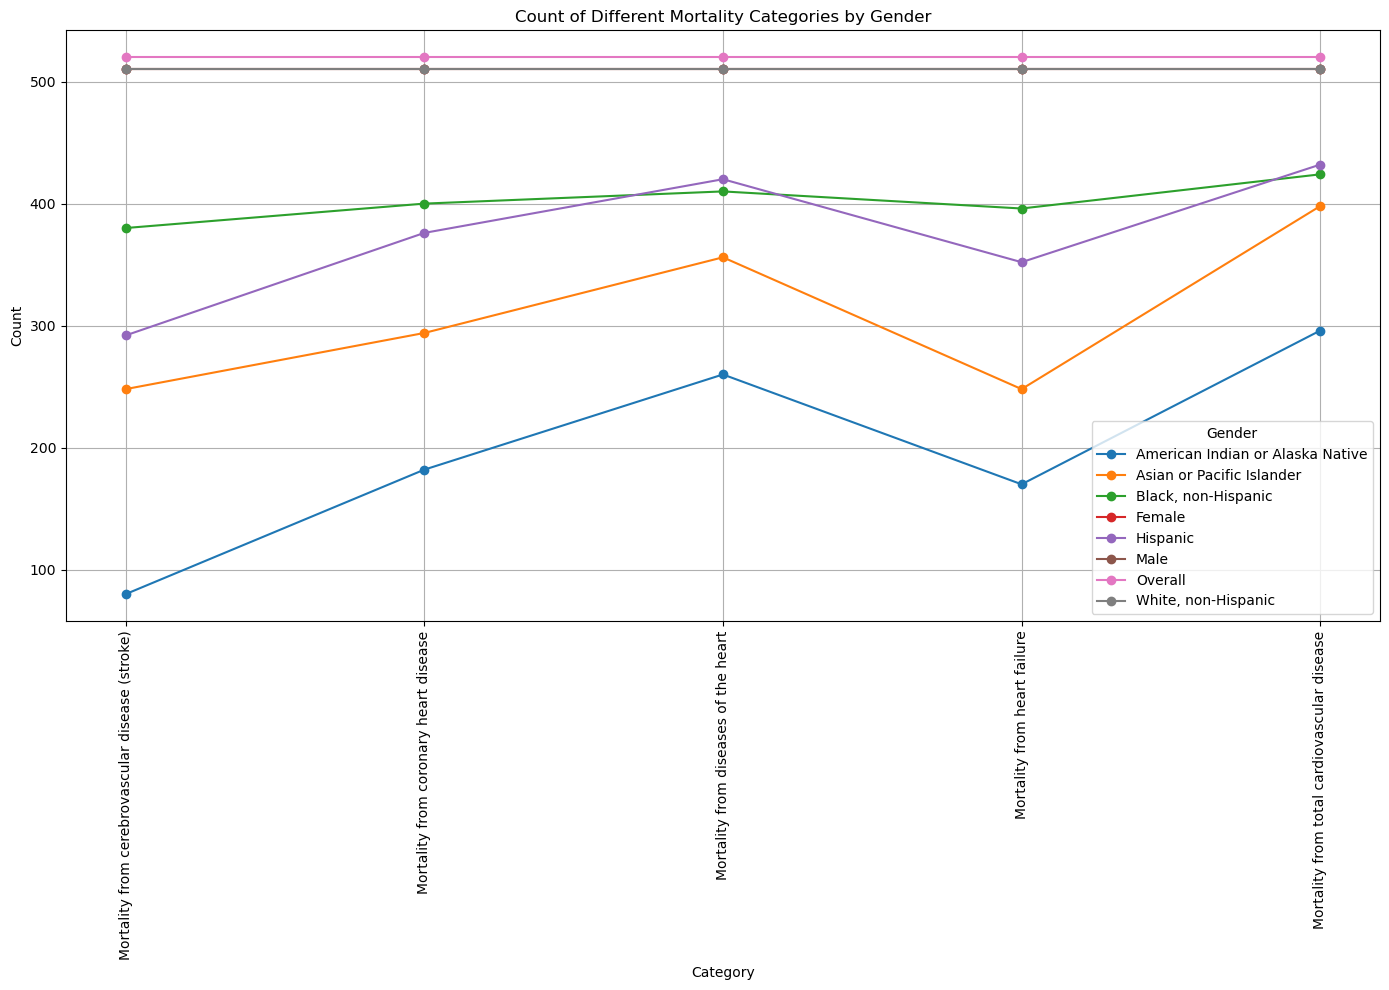

In [52]:
#Another try to combine multiple factors based on Gender

import pandas as pd
import matplotlib.pyplot as plt

# Filter in rows where 'Category' contains the phrase 'Mortality from'
mortality_df = df1[df1['Category'].str.contains('Mortality from', case=False)]
# Convert 'Value' to numeric, if not already done
mortality_df['Value'] = pd.to_numeric(mortality_df['Value'], errors='coerce')
# Drop rows where 'Value' is NaN after conversion
mortality_df = mortality_df.dropna(subset=['Value'])
# Group by 'Category' and 'RaceGender Data' and calculate the count
mortality_gender_count = mortality_df.groupby(['Category', 'RaceGender Data']).size().reset_index(name='Count')
# Display the result
print(mortality_gender_count)
# Plot the data
plt.figure(figsize=(14, 10))
# Plot each gender's data separately
categories = mortality_gender_count['Category'].unique()
for gender in mortality_gender_count['RaceGender Data'].unique():
   gender_data = mortality_gender_count[mortality_gender_count['RaceGender Data'] == gender]
   plt.plot(gender_data['Category'], gender_data['Count'], marker='o', linestyle='-', label=gender)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Different Mortality Categories by Gender')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to fit everything
# Show the plot
plt.show()

                                          Category RaceGender Data  Count
0  Mortality from cerebrovascular disease (stroke)          Female    510
1  Mortality from cerebrovascular disease (stroke)            Male    510
2            Mortality from coronary heart disease          Female    510
3            Mortality from coronary heart disease            Male    510
4             Mortality from diseases of the heart          Female    510
5             Mortality from diseases of the heart            Male    510
6                     Mortality from heart failure          Female    510
7                     Mortality from heart failure            Male    510
8      Mortality from total cardiovascular disease          Female    510
9      Mortality from total cardiovascular disease            Male    510


C:\Users\local_yhassan\Temp\ipykernel_36668\1481328676.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_df['Value'] = pd.to_numeric(mortality_df['Value'], errors='coerce')
C:\Users\local_yhassan\Temp\ipykernel_36668\1481328676.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to fit everything


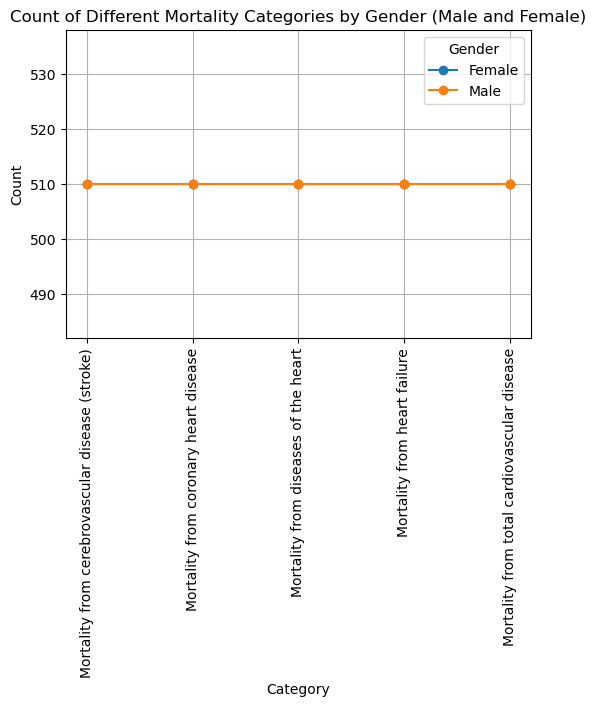

In [49]:
#########Male and female only
import pandas as pd
import matplotlib.pyplot as plt

# Filter in rows where 'Category' contains the phrase 'Mortality from'
mortality_df = df1[df1['Category'].str.contains('Mortality from', case=False)]
# Convert 'Value' to numeric, if not already done
mortality_df['Value'] = pd.to_numeric(mortality_df['Value'], errors='coerce')
# Drop rows where 'Value' is NaN after conversion
mortality_df = mortality_df.dropna(subset=['Value'])
# Further filter to keep only "Male" and "Female" in 'RaceGender Data'
mortality_df = mortality_df[mortality_df['RaceGender Data'].isin(['Male', 'Female'])]
# Group by 'Category' and 'RaceGender Data' and calculate the count
mortality_gender_count = mortality_df.groupby(['Category', 'RaceGender Data']).size().reset_index(name='Count')
# Display the result
print(mortality_gender_count)
# Plot the data
plt.figure(figsize=(6, 4))
# Plot each gender's data separately
for gender in mortality_gender_count['RaceGender Data'].unique():
   gender_data = mortality_gender_count[mortality_gender_count['RaceGender Data'] == gender]
   plt.plot(gender_data['Category'], gender_data['Count'], marker='o', linestyle='-', label=gender)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Different Mortality Categories by Gender (Male and Female)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to fit everything
# Show the plot
plt.show()

             State    Value
36        Oklahoma  20430.7
24     Mississippi  19299.4
22        Michigan  19108.1
0          Alabama  18301.8
3         Arkansas  17451.9
18       Louisiana  17294.6
28          Nevada  17229.5
16          Kansas  17201.1
32        New York  17094.7
25        Missouri  16791.7
4       California  16773.1
38    Pennsylvania  16544.0
35            Ohio  16479.6
50       Wisconsin  16256.3
42       Tennessee  16072.2
9          Florida  16048.4
40  South Carolina  15865.2
33  North Carolina  15506.0
13        Illinois  15390.4
17        Kentucky  15331.4


C:\Users\local_yhassan\Temp\ipykernel_36668\2698924886.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_cvd_df['Value'] = pd.to_numeric(mortality_cvd_df['Value'], errors='coerce')


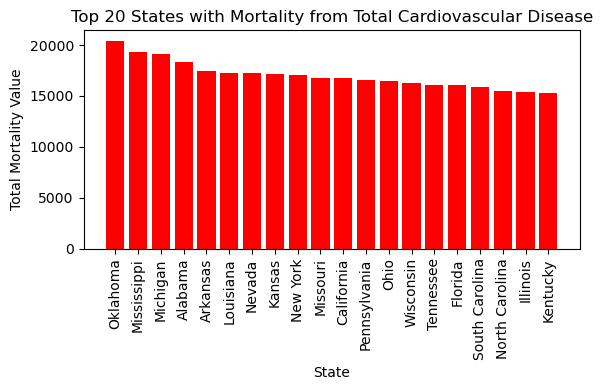

In [46]:
###Mortality by State- top 5-

import pandas as pd
import matplotlib.pyplot as plt

# Filter in rows where 'Category' is 'Mortality from total cardiovascular disease'
mortality_cvd_df = df1[df1['Category'] == 'Mortality from total cardiovascular disease']

# Convert 'Value' to numeric, if not already done
mortality_cvd_df['Value'] = pd.to_numeric(mortality_cvd_df['Value'], errors='coerce')
# Drop rows where 'Value' is NaN after conversion
mortality_cvd_df = mortality_cvd_df.dropna(subset=['Value'])
# Group by 'State' and calculate the sum of 'Value'
state_mortality_sum = mortality_cvd_df.groupby('State')['Value'].sum().reset_index()
# Sort the states by the sum of mortality values and select the top 5
top_20_states = state_mortality_sum.sort_values(by='Value', ascending=False).head(20)
# Display the result
print(top_20_states)
# Plot the data as a bar plot
plt.figure(figsize=(6, 4))
plt.bar(top_20_states['State'], top_20_states['Value'], color='red')
plt.xlabel('State')
plt.ylabel('Total Mortality Value')
plt.xticks(rotation=90)
plt.title('Top 20 States with Mortality from Total Cardiovascular Disease')
plt.tight_layout()  # Adjust layout to fit everything
# Show the plot
plt.show()


            State    Value
44  United States   2394.2
29  New Hampshire   8610.5
46        Vermont   9214.6
19          Maine   9387.1
51        Wyoming  11001.7


C:\Users\local_yhassan\Temp\ipykernel_36668\1466839550.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_cvd_df['Value'] = pd.to_numeric(mortality_cvd_df['Value'], errors='coerce')


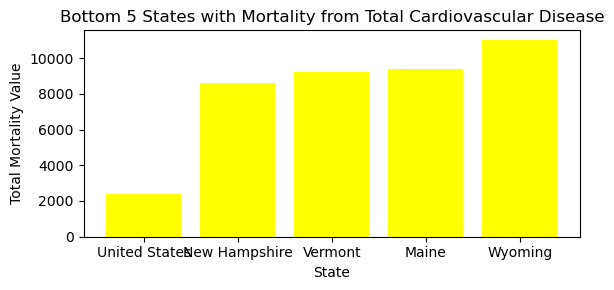

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter in rows where 'Category' is 'Mortality from total cardiovascular disease'
mortality_cvd_df = df1[df1['Category'] == 'Mortality from total cardiovascular disease']

# Convert 'Value' to numeric, if not already done
mortality_cvd_df['Value'] = pd.to_numeric(mortality_cvd_df['Value'], errors='coerce')

# Drop rows where 'Value' is NaN after conversion
mortality_cvd_df = mortality_cvd_df.dropna(subset=['Value'])
# Group by 'State' and calculate the sum of 'Value'
state_mortality_sum = mortality_cvd_df.groupby('State')['Value'].sum().reset_index()
# Sort the states by the sum of mortality values and select the bottom 5
bottom_5_states = state_mortality_sum.sort_values(by='Value', ascending=True).head(5)
# Display the result
print(bottom_5_states)

# Plot the data as a bar plot
plt.figure(figsize=(6, 3))
plt.bar(bottom_5_states['State'], bottom_5_states['Value'], color='yellow')
plt.xlabel('State')
plt.ylabel('Total Mortality Value')
plt.title('Bottom 5 States with Mortality from Total Cardiovascular Disease')
plt.tight_layout()  # Adjust layout to fit everything
# Show the plot
plt.show()

In [62]:
#exporting to Excel
df1.to_excel(r'C:\Users\yhassan\OneDrive - Healthfirst\Output_Yaruq_Capstone_Final.xlsx',index=False, sheet_name='MainSheet')


In [ ]:
##CONCLUSION from Data Analysis
### Data is not clean and needs some imporvement
### As per the data provided, CardioVascular Diseases tops the chart for leading the Chronic diseases in the U.S.
### Oklahoma has the highest mortality rate and New Hampshire has the lowest.
### Mortality is subcategorized with five factors.
### As per the provided data, Mortality from total cardiovascular disease is the leading factor , then comes 
##  diseases of the heart,coronary heart disease, heart failure, stroke. 
